In [1]:
from pip._internal.utils.misc import get_installed_distributions
installed_packages = get_installed_distributions()

installed_packages

import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [2]:
#install the required packages
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load in data
df = pd.read_csv('../neuromap_data1-40.csv')

## DATA CLEARNING
#delete first 12 rows
df.drop(df.index[:12], inplace=True)

# # rename column questions to shorter
df.columns = ['timestamp','birth_year', 'birthplace', 'gender','undergrad_loc', 'undergrad_research',
            'masters_loc', 'masters_inst', 'masters_research','doctoral_loc', 'doctoral_inst', 'doctoral_research',
            'undergrad_inst', 'delete', 'ra_lm_loc', 'ra_lm_inst', 'ra_lm_research',
            'postdoc_loc' ,'postdoc_inst','postdoc_research', 'google_scholar', 'twitter', 'linkedin', 'github',
            'undergrad_ra_lm_exp','name','undergrad_deg','masters_qual', 'phd_qual', 'post_doc_qual', 'faculty_qual',
            'faculty_pos', 'prior_progr_lang','faculty_loc','faculty_inst', 'faculty_research', 'consent',
            'delete','delete', 'delete']

#remove unecessary colums
df= df.drop(['delete'], axis=1)


In [4]:
doc_loc = df.doctoral_loc
doc_loc

12                                Rovereto, Italy
13                 Melbourne, Victoria, Australia
14                                 Birmingham, UK
15                                Rovereto, Italy
16                            Pittsburgh, PA, USA
17                      Rovereto, Trentino, Italy
18                          Philadelphia, PA, USA
19                                 Washington, DC
20                             Frankfurt, Germany
21                                   Paris/France
22                             San Diego, CA, USA
23                             Princeton, NJ, USA
24                     Seattle, WA, United States
25                                 Miami, FL, USA
26                                       York, UK
27                               Hamburg, Germany
28                                 Pittsburgh, PA
29                             Seoul, South Korea
30                                            NaN
31                         London, United Kingdom


In [4]:
#view the first 10 rows of a specific column
doc_res = df.doctoral_research
doc_res.head(10)

12                     healthy, fmri, movement decoding
13    mild traumatic brain injury, TMS-EEG, neuropsy...
14    temporal, parietal areas; lesion analysis, fmr...
15    fMRI, vision, ventral stream, object perceptio...
16              development, psychosis, fMRI, thalamus 
17                     healthy, fMRI, movement decoding
18    adolescent decision-making, fMRI, reward proce...
19               aging and experiential decision making
20    MEG, fMRI, predictive-processing, schema proce...
21    neuroimaging, brain development, myelin, pytho...
Name: doctoral_research, dtype: object

In [5]:
#to check 
a = doc_res.unique()
b = len(doc_res.unique())
        
print (a,b)

['healthy, fmri, movement decoding'
 'mild traumatic brain injury, TMS-EEG, neuropsychology'
 'temporal, parietal areas; lesion analysis, fmri, stroke'
 'fMRI, vision, ventral stream, object perception, animacy'
 'development, psychosis, fMRI, thalamus '
 'healthy, fMRI, movement decoding'
 'adolescent decision-making, fMRI, reward processing, development, risk-taking'
 'aging and experiential decision making'
 'MEG, fMRI, predictive-processing, schema processing, episodic memory'
 'neuroimaging, brain development, myelin, python, BrainVISA'
 'Autism, multimodal imaging, thalamus, neuropsychology'
 'communication, naturalistic, human fMRI,  neural synchrony'
 'molucular dynamics simulation analysis'
 'large-scale brain network variability wrt ovarian hormones'
 'Functional connectivity/Resting state/ Default mode network/Mind wandering/'
 'Decision Making, fMRI, Behavioural Modelling'
 'addiction, mood disorders, adolescent development, MRI, diffusion imaging'
 'medial prefrontal corte

In [7]:
#?WordCloud

stopwords=set(STOPWORDS)
stopwords.update(["in","along","and","making"])

text=" ".join(str(dscp) for dscp in doc_res)
#print ("{} words in all combined review.".format(len(text)))




2117 words in all combined review.


In [8]:
#Values of 255 are pure white, whereas values of 1 are black. 
#Use the function below to transform mask if the mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [9]:
head_mask = np.array(Image.open("img/head.png"))
if len(head_mask.shape) ==3:
 head_mask = head_mask[:,:,-1]

In [10]:
# Transform your mask into a new one that will work with the function:
tf_head_mask = np.ndarray((head_mask.shape[0],head_mask.shape[1]), np.int32)

for i in range(len(head_mask)):
    tf_head_mask[i] = list(map(transform_format, head_mask[i]))
    
tf_head_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

(-0.5, 685.5, 755.5, -0.5)

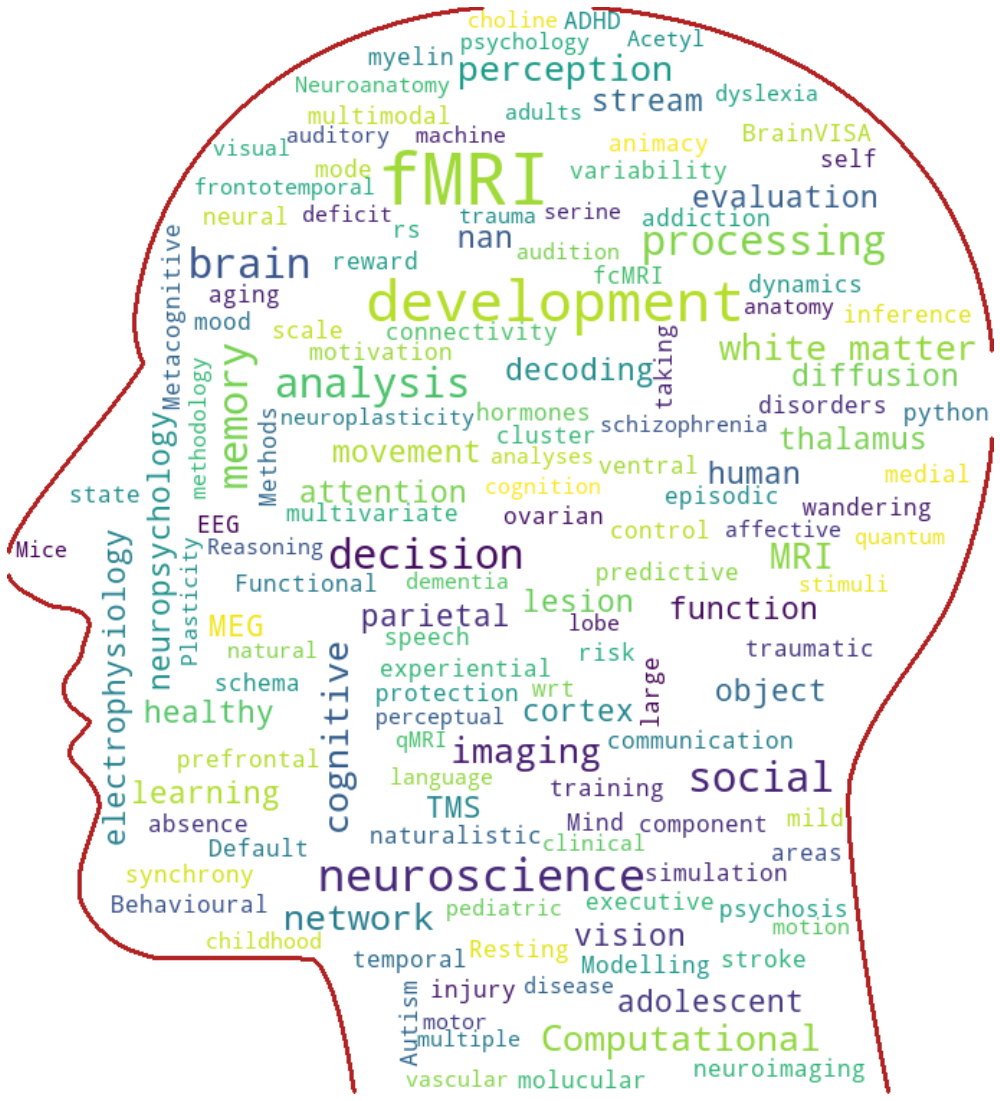

In [11]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=tf_head_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[40,20])
plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")



# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

In [12]:
brain_mask = np.array(Image.open("img/brain.png"))
if len(brain_mask.shape) ==3:
 brain_mask = brain_mask[:,:,-1]


In [13]:
# Transform your mask into a new one that will work with the function:
tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)


for i in range(len(brain_mask)):
    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
tf_brain_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

(-0.5, 688.5, 588.5, -0.5)

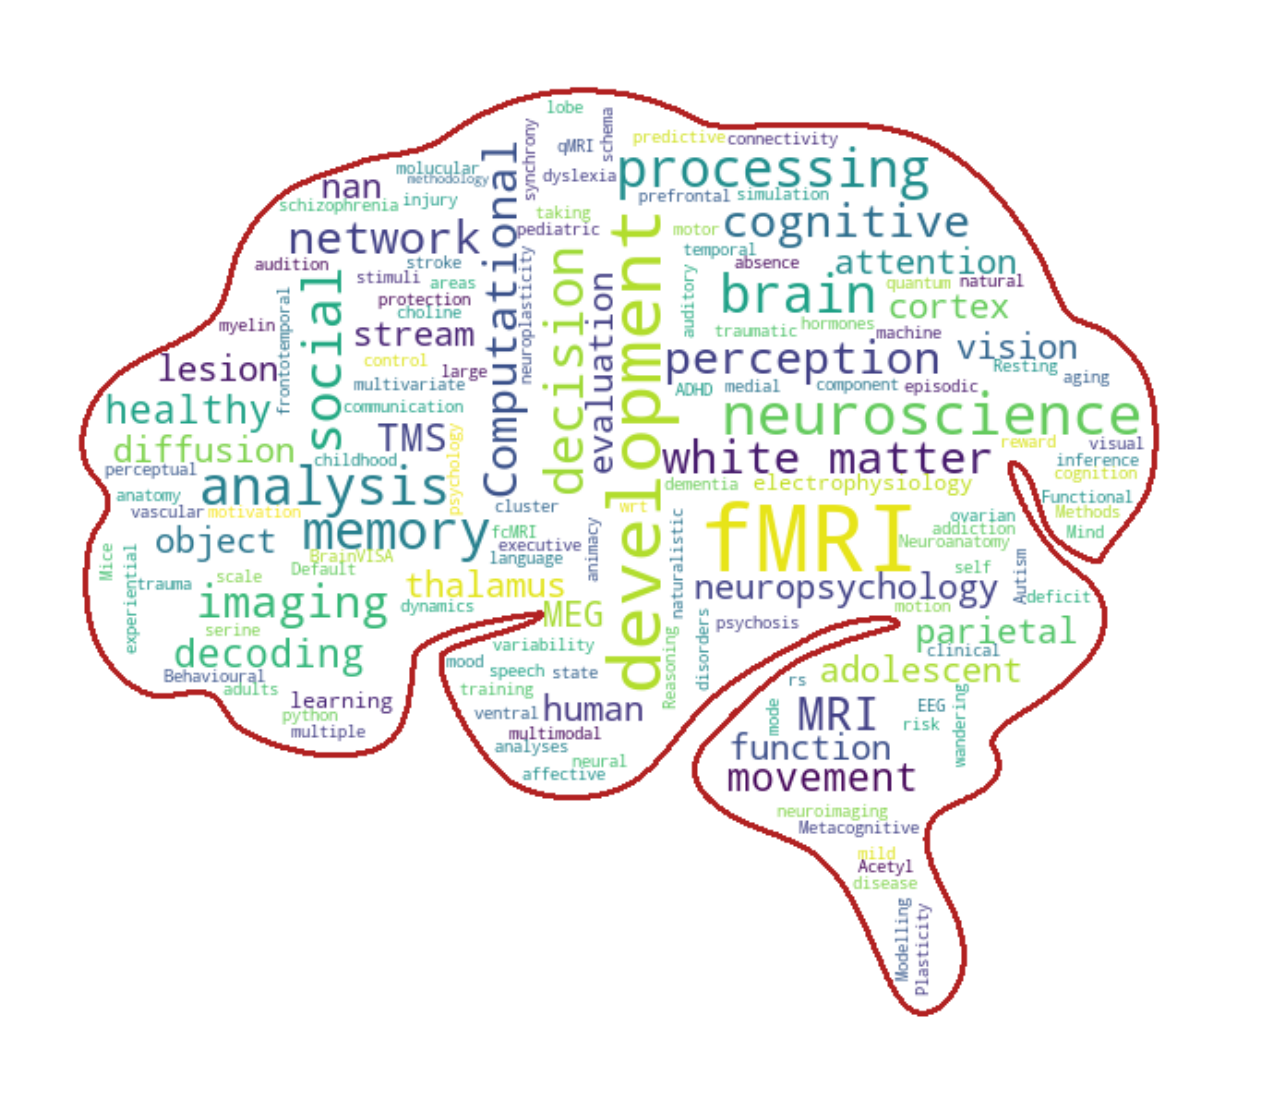

In [14]:

# Create and generate a word cloud image:
wdcd = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, max_words=1000, background_color="white", contour_width=3, contour_color='firebrick')
wdcd.generate(text)

# Display the generated image:
plt.figure(figsize=[40,20])

plt.imshow(wdcd, interpolation='bilinear')
plt.axis("off")


# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")

In [15]:
#to import neccessary module to run interactive features
import ipywidgets as widgets


In [26]:
df.doctoral_loc.head()

doc_loc_list = df.doctoral_loc

df_doc_loc = df.dropna(subset=["doctoral_loc"])
#if None in doc_loc_list: doc_loc_list.remove(None)


replace_dict = {
    "Rio de Janeiro, Brazil AND Montreal, Canada": "Montreal, Canada"
}

df_doc_loc['doctoral_loc'] = df_doc_loc['doctoral_loc'].replace(replace_dict)    

#df_doc_loc.loc[:,"doctoral_loc"]
df_doc_loc.doctoral_loc

#print(df.shape, df_doc_loc.shape)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


12                        Rovereto, Italy
13         Melbourne, Victoria, Australia
14                         Birmingham, UK
15                        Rovereto, Italy
16                    Pittsburgh, PA, USA
17              Rovereto, Trentino, Italy
18                  Philadelphia, PA, USA
19                         Washington, DC
20                     Frankfurt, Germany
21                           Paris/France
22                     San Diego, CA, USA
23                     Princeton, NJ, USA
24             Seattle, WA, United States
25                         Miami, FL, USA
26                               York, UK
27                       Hamburg, Germany
28                         Pittsburgh, PA
29                     Seoul, South Korea
31                 London, United Kingdom
32                Leiden, the Netherlands
33                        Boston, MA, USA
34         Santa Barbara, California, USA
35            Hanover, New Hampshire, USA
36                        Austin, 

In [33]:
import geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="neuromap_cloud")

from geopy.exc import GeocoderTimedOut

def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)
    

#Loop through rows to get the longitude and latitude of the hometowns
lat=[]
long=[]

for DocTownLocat in df_doc_loc.doctoral_loc:
    location_1 = do_geocode(DocTownLocat) #, timeout=10)
    #print((location_1.latitude, location_1.longitude, DocTownLocat))    
    
    lat.append(location_1.latitude)
    long.append(location_1.longitude)


(45.886548, 11.0452369, 'Rovereto, Italy')
(-37.8142176, 144.9631608, 'Melbourne, Victoria, Australia')
(52.4775396, -1.894053, 'Birmingham, UK')
(45.886548, 11.0452369, 'Rovereto, Italy')
(40.4416941, -79.9900861, 'Pittsburgh, PA, USA')
(45.886548, 11.0452369, 'Rovereto, Trentino, Italy')
(39.9527237, -75.1635262, 'Philadelphia, PA, USA')
(38.8950092, -77.0365625, 'Washington, DC')
(50.1106444, 8.6820917, 'Frankfurt, Germany')
(48.8566101, 2.3514992, 'Paris/France')
(32.7174209, -117.1627714, 'San Diego, CA, USA')
(40.3492744, -74.6592958, 'Princeton, NJ, USA')
(47.6038321, -122.3300624, 'Seattle, WA, United States')
(25.7742658, -80.1936589, 'Miami, FL, USA')
(53.9590555, -1.0815361, 'York, UK')
(53.550341, 10.000654, 'Hamburg, Germany')
(40.4416941, -79.9900861, 'Pittsburgh, PA')
(37.5666791, 126.9782914, 'Seoul, South Korea')
(51.5073219, -0.1276474, 'London, United Kingdom')
(52.1518157, 4.48110886662043, 'Leiden, the Netherlands')
(42.3602534, -71.0582912, 'Boston, MA, USA')
(34.

In [37]:
       
#Saving lat and long in separate columns in the dataframe    
df_doc_loc['DocTownLatitude'] = lat
df_doc_loc['DocTownLatitude'] = df_doc_loc['DocTownLatitude'].astype('float')

df_doc_loc['DocTownLongitude'] = long
df_doc_loc['DocTownLongitude'] = df_doc_loc['DocTownLongitude'].astype('float')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [82]:
df_doc_loc

df_doc_loc["Doc_continent"] = ""
DocTLong = df_doc_loc.DocTownLongitude
DocTLat = df_doc_loc.DocTownLatitude


#north-america-long: -180 to -50
#north-america-lat: +10 to +90
mask = (DocTLong > -180)
mask &= (DocTLong < -50)
mask &= (DocTLat > 10)
mask &= (DocTLat < 90)
df_doc_loc.loc[mask, 'Doc_continent'] = "NAmerica"

#south-america-long: -85 to -30
#south-america-lat: -60 to +10
mask = (DocTLong > -85)
mask &= (DocTLong < -30)
mask &= (DocTLat > -60)
mask &= (DocTLat < 10)
df_doc_loc.loc[mask, 'Doc_continent'] = "SAmerica"

#europe-long: -15 to +60
#europe-lat: +35 to +70
mask = (DocTLong > -15)
mask &= (DocTLong < 60)
mask &= (DocTLat > 35)
mask &= (DocTLat < 70)
df_doc_loc.loc[mask, 'Doc_continent'] = "Europe"


#asia-long: +30 to 180
#asia-lat: -50 to +90
mask = (DocTLong > 30)
mask &= (DocTLong < 180)
mask &= (DocTLat > -50)
mask &= (DocTLat < 90)
df_doc_loc.loc[mask, 'Doc_continent'] = "AsiaPac"


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [83]:
df_doc_loc


,timestamp,birth_year,birthplace,gender,undergrad_loc,undergrad_research,masters_loc,masters_inst,masters_research,doctoral_loc,...,faculty_qual,faculty_pos,prior_progr_lang,faculty_loc,faculty_inst,faculty_research,consent,DocTownLatitude,DocTownLongitude,Doc_continent
12,8/6/2019 5:52:27,16/10/88,"Verona, Italy",Male,"Rovereto, Italy","healthy, tracking","Rovereto, Italy",Uni trento,"healthy, eyetracking","Rovereto, Italy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.886548,11.045237,Europe
13,8/6/2019 19:38:09,1991,"Northampton, United Kingdom",Female,"Wollongong, NSW, Australia","cannabis use, EEG, working memory",NaN,NaN,NaN,"Melbourne, Victoria, Australia",...,No,NaN,NaN,NaN,NaN,NaN,Yes,-37.814218,144.963161,AsiaPac
14,8/6/2019 19:39:18,1986,Hong Kong,Male,Hong Kong,"sexual health, clinical, survey","Birmingham, UK",University of Birmingham,"developmental disabilities, eating, cognitive ...","Birmingham, UK",...,No,NaN,NaN,NaN,NaN,NaN,Yes,52.477540,-1.894053,Europe
15,8/6/2019 22:19:20,1988,"Novosibirsk, Russia",Female,"Novosibirsk, Russia","mathematics, topology, geometry","Rovereto, Italy",University of Trento,"rats, multisensory perception, tactile perception","Rovereto, Italy",...,No,NaN,NaN,NaN,NaN,NaN,Yes,45.886548,11.045237,Europe
16,8/6/2019 19:34:13,1994,"Split, Croatia",Female,"Providence, RI, USA","Theory of mind, suicide, development, adolesce...",NaN,NaN,NaN,"Pittsburgh, PA, USA",...,No,NaN,NaN,NaN,NaN,NaN,Yes,40.441694,-79.990086,NAmerica
17,8/6/2019 19:37:29,1988,"Verona, Veneto, Italy",Male,"Rovereto, Trentino, Italy","healthy, behavioral tracking with IR markers","Rovereto, Trentino, Italy",University of Trento,"healthy, eyetracking on pointlight displays","Rovereto, Trentino, Italy",...,No,NaN,NaN,NaN,NaN,NaN,Yes,45.886548,11.045237,Europe
18,8/6/2019 19:51:26,1992,"Chicago, IL, USA",Female,"Ann Arbor, MI, USA","Communication neuroscience, social influence, ...",NaN,NaN,NaN,"Philadelphia, PA, USA",...,No,NaN,NaN,NaN,NaN,NaN,Yes,39.952724,-75.163526,NAmerica
19,8/6/2019 19:53:20,1979,"Wichita, KS, United States",Female,"Lawrence, KS, United States",NaN,"Washington, DC, United States",The Catholic University of America,Mental models in science education,"Washington, DC",...,Yes,NaN,NaN,"Dallas, TX, United States",University of Texas at Dallas,"Aging, Decision making, Learning",Yes,38.895009,-77.036563,NAmerica
20,8/6/2019 19:53:48,2019,"Buenos Aires, Argentina",Female,"Buenos Aires, Argentina","psychology, cognitive-neuroscience, eeg","Buenos Aires, Argentina",Favaloro University,"eeg, language-processing, bilingualism","Frankfurt, Germany",...,No,NaN,NaN,NaN,NaN,NaN,Yes,50.110644,8.682092,Europe
21,8/6/2019 19:54:20,1988,Perm/Russia,Female,Moscow/Russia,"brain-computer interface, EEG, Matlab, motor i...",Neuroscience,University of Strasbourg,"schizophrenia, animal model, thalamo-cortical ...",Paris/France,...,Yes,NaN,NaN,"Perm, Russia",Higher School of Economics,"diffusion MRI, MRI relaxometry, TMS, EEG, stro...",Yes,48.856610,2.351499,Europe


In [91]:
#subsetting the df_doc_loc dataframe by different continents
df_doc_NAm = df_doc_loc[df_doc_loc.Doc_continent=="NAmerica"] 
df_doc_Eur = df_doc_loc[df_doc_loc.Doc_continent=="Europe"]
df_doc_AP = df_doc_loc[df_doc_loc.Doc_continent=="AsiaPac"] 

In [98]:
## this needs updating
doc_res_NAm = df_doc_NAm.doctoral_research
doc_res_Eur = df_doc_Eur.doctoral_research
doc_res_AP = df_doc_AP.doctoral_research

#doc_res

textNAm =" ".join(str(dscp) for dscp in doc_res_NAm)
textEur =" ".join(str(dscp) for dscp in doc_res_Eur)
textAP =" ".join(str(dscp) for dscp in doc_res_AP)

stopwords=set(STOPWORDS)
stopwords.update(["in","along","and","making"])


In [93]:
#Values of 255 are pure white, whereas values of 1 are black. 
#Use the function below to transform mask if the mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [94]:
brain_mask = np.array(Image.open("img/brain.png"))
if len(brain_mask.shape) ==3:
 brain_mask = brain_mask[:,:,-1]


In [95]:

# Transform your mask into a new one that will work with the function:
tf_brain_mask = np.ndarray((brain_mask.shape[0],brain_mask.shape[1]), np.int32)


for i in range(len(brain_mask)):
    tf_brain_mask[i] = list(map(transform_format, brain_mask[i]))
    
tf_brain_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

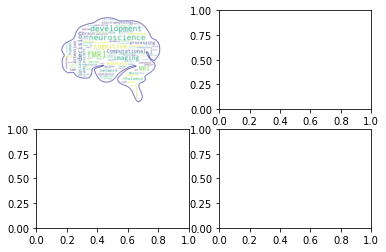

In [111]:

# Create and generate a word cloud image:
wc_NAm = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='navy')
wc_NAm.generate(textNAm)

wc_Eur = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='navy')
wc_Eur.generate(textEur)

wc_AP = WordCloud(mask=brain_mask, stopwords=stopwords, max_font_size=50, 
                 max_words=1000, background_color="white", contour_width=3, 
                contour_color='navy')
wc_AP.generate(textAP)

# Display the generated image:
#plt.figure(figsize=[40,20])

#plt.imshow(wdcd, interpolation='bilinear')
#plt.axis("off")
#
#
#
## Save the image in the img folder:
##wordcloud.to_file("img/first_review.png")
#
##NOT NEEDED AT THE MOMENT
fig, axs = plt.subplots(2,2)
ax_NAm = axs[0,0]
ax_NAm.imshow(wc_NAm, interpolation='bilinear')
ax_NAm.set_axis_off()



#axs